Convolutional neural networks (CNNs) emerged from the study of the brain’s visual cortex.  They power image search services, self-driving cars, automatic video classification systems, and more. Moreover, CNNs are not restricted to visual perception: they are also successful at many other tasks, such as voice recognition and natural language processing. However, we will focus on visual applications for now.

- **NOTE**: Why not simply use a deep neural network with fully connected layers for image recognition tasks? Unfortunately, although this works fine for small images (e.g., MNIST), it breaks down for larger images because of the huge number of parameters it requires. For example, a 100 × 100–pixel image has 10,000 pixels, and if the first layer has just 1,000 neurons (which already severely restricts the amount of information transmitted to the next layer), this means a total of 10 million connections. And that’s just the first layer. CNNs solve this problem using partially connected layers and weight sharing.

# Convolutional Layers

The most important building block of a CNN is the convolutional layer: 

- neurons in the first convolutional layer are not connected to every single pixel in the input image (like they were in the layers discussed in previous chapters), but only to pixels in their receptive fields

- In turn, each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer.

This architecture allows the network to concentrate on small low-level features in the first hidden layer, then assemble them into larger higher-level features in the next hidden layer, and so on.

This hierarchical structure is common in real-world images, which is one of the reasons why CNNs work so well for image recognition.

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1402.png)

- **NOTE**: All the multilayer neural networks we’ve looked at so far had layers composed of a long line of neurons, and we had to flatten input images to 1D before feeding them to the neural network. In a CNN each layer is represented in 2D, which makes it easier to match neurons with their corresponding inputs.

A neuron located in row $i$, column $j$ of a given layer is connected to the outputs of the neurons in the previous layer located in rows $i$ to $i + f_h – 1$, columns $j$ to $j + f_w – 1$, 

- where fh and fw are the height and width of the receptive field 

- In order for a layer to have the same height and width as the previous layer, it is common to add zeros around the inputs, as shown in the diagram. This is called **zero padding**.

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1403.png) 


It is also possible to connect a large input layer to a much smaller layer by spacing out the receptive field (shown below). This dramatically reduces the model’s computational complexity.

- The shift from one receptive field to the next is called the **stride**

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1404.png)

In the diagram, a 5 × 7 input layer (plus zero padding) is connected to a 3 × 4 layer, using 3 × 3 receptive fields and a stride of 2 (in this example the stride is the same in both directions, but it does not have to be so). A neuron located in row $i$, column $j$ in the upper layer is connected to the outputs of the neurons in the previous layer located in rows $i × s_h$ to $i × s_h + f_h – 1$, columns $j × s_w$ to $j × s_w + f_w – 1$, 

- where $s_h$ and $s_w$ are the vertical and horizontal strides.

# Filters

- A neuron’s weights can be represented as a small image the size of the receptive field. These sets of weights, are called **filters** (or convolution kernels).

- a layer full of neurons using the same filter outputs a **feature map**, which highlights the areas in an image that activate the filter the most.

Each filter will focus on a field. A field is for 2-d is commonly horizontal or vertical. 

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1405.png)

- a layer full of neurons using the same filter outputs a feature map, which highlights the areas in an image that activate the filter the most. 

# Stacking Multiple Feature Maps

So far we have represented CNNs with 2-d layers, in reality they have multiple filters, outputs one feature map per filter.

- It has one neuron per pixel in each feature map, and all neurons within a given feature map share the same parameters (i.e., the same weights and bias term). Neurons in different feature maps use different parameters

A neuron’s receptive field is the same as described earlier, but it extends across all the previous layers’ feature maps. In short, a convolutional layer simultaneously applies multiple trainable filters to its inputs, making it capable of detecting multiple features anywhere in its inputs.

- **NOTE**: The fact that all neurons in a feature map share the same parameters dramatically reduces the number of parameters in the model. Once the CNN has learned to recognize a pattern in one location, it can recognize it in any other location. In contrast, once a regular DNN has learned to recognize a pattern in one location, it can recognize it only in that particular location.

Input images are also composed of multiple sublayers: one per color channel. There are typically three: red, green, and blue (RGB). Grayscale images have just one channel, but some images may have much more—for example, satellite images that capture extra light frequencies (such as infrared).

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1406.png)


Specifically, a neuron located in row $i$, column $j$ of the feature map $k$ in a given convolutional layer $l$ is connected to the outputs of the neurons in the previous layer $l – 1$, located in rows $i × s_h$ to $i × s_h + f_h – 1$ and columns $j × s_w$ to $j × s_w + f_w – 1$, across all feature maps (in layer $l – 1$). Note that all neurons located in the same row $i$ and column $j$ but in different feature maps are connected to the outputs of the exact same neurons in the previous layer.

With the information we have covered we can now compute the output of a convolutional layer, in the equation below. All it does is calculate the weighted sum of all the inputs, plus the bias term.

**Equation 14-1. Computing the output of a neuron in a convolutional layer**

$$
z_{i, j, k}=b_{k}+\sum_{u=0}^{f_{h}-1} \sum_{v=0}^{f_{w}-1} \sum_{k l=0}^{f_{n^{\prime}}-1} x_{i^{\prime}, j^{\prime}, k^{\prime}} \times w_{u, v, k^{\prime}, k} \quad \text { with }\left\{\begin{array}{l}
i /=i \times s_{h}+u \\
j^{\prime}=j \times s_{w}+v
\end{array}\right.
$$


In this equation:

- $z_{i, j, k}$ is the output of the neuron located in row $i$, column $j$ in feature map $k$ of the convolutional layer (layer $l$).

- As explained earlier, $s_h$ and $s_w$ are the vertical and horizontal strides, $f_h$ and $f_w$ are the height and width of the receptive field, and $f_{n′}$ is the number of feature maps in the previous layer (layer $l – 1$).

- $x_{i′, j′, k′}$ is the output of the neuron located in layer $l – 1$, row $i′$, column $j′$, feature map $k′$ (or channel $k′$ if the previous layer is the input layer).

- $b_k$ is the bias term for feature map $k$ (in layer $l$). You can think of it as a knob that tweaks the overall brightness of the feature map $k$.

- $w_{u, v, k′ ,k}$ is the connection weight between any neuron in feature map $k$ of the layer $l$ and its input located at row $u$, column $v$ (relative to the neuron’s receptive field), and feature map $k′$.

# TensorFlow Implementation

In TensorFlow, each input image is typically represented as a 3D tensor of shape [height, width, channels]. A mini-batch is represented as a 4D tensor of shape [mini-batch size, height, width, channels]. The weights of a convolutional layer are represented as a 4D tensor of shape [$f_h, f_w, f_n′, f_n$]. The bias terms of a convolutional layer are simply represented as a 1D tensor of shape [$f_n$].

Let’s look at a simple example. It loads two images, creates two filters and applies them to both images, and displays one of the feature maps. 

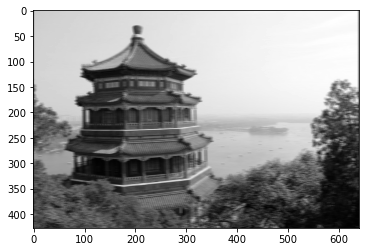

In [1]:
from sklearn.datasets import load_sample_image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

Let’s go through this code:

- The pixel intensity for each color channel is represented as a byte from 0 to 255, so we scale these features simply by dividing by 255, to get floats ranging from 0 to 1.

- Then we create two 7 × 7 filters (one with a vertical white line in the middle, and the other with a horizontal white line in the middle).

- We apply them to both images using the tf.nn.conv2d() function, which is part of TensorFlow’s low-level Deep Learning API. In this example, we use zero padding (padding="SAME") and a stride of 1.

- Finally, we plot one of the resulting feature maps.


tf.nn.conv2d() line deserves a bit more explanation:

- images is the input mini-batch (a 4D tensor, as explained earlier).

- filters is the set of filters to apply (also a 4D tensor, as explained earlier).

- strides is equal to 1, but it could also be a 1D array with four elements, where the two central elements are the vertical and horizontal strides (sh and sw). The first and last elements must currently be equal to 1. They may one day be used to specify a batch stride (to skip some instances) and a channel stride (to skip some of the previous layer’s feature maps or channels).

- padding must be either "SAME" or "VALID":

 - If set to "SAME", the convolutional layer uses zero padding if necessary. The output size is set to the number of input neurons divided by the stride, rounded up. For example, if the input size is 13 and the stride is 5 (see Figure below), then the output size is 3 (i.e., 13 / 5 = 2.6, rounded up to 3). Then zeros are added as evenly as possible around the inputs, as needed. When strides=1, the layer’s outputs will have the same spatial dimensions (width and height) as its inputs, hence the name same.

 - If set to "VALID", the convolutional layer does not use zero padding and may ignore some rows and columns at the bottom and right of the input image, depending on the stride, as shown below (for simplicity, only the horizontal dimension is shown here, but of course the same logic applies to the vertical dimension). This means that every neuron’s receptive field lies strictly within valid positions inside the input (it does not go out of bounds), hence the name valid.
 
![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1407.png)

In this example we manually defined the filters, but in a real CNN you would normally define filters as trainable variables so the neural net can learn which filters work best, as explained earlier. Instead of manually creating the variables, use the keras.layers.Conv2D layer:



In [2]:
from tensorflow import keras
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding="same", activation="relu")

This code creates a Conv2D layer with 32 filters, each 3 × 3, using a stride of 1 (both horizontally and vertically) and "same" padding, and applying the ReLU activation function to its outputs. 

convolutional layers have quite a few hyperparameters: you must choose the number of filters, their height and width, the strides, and the padding type. We can use cross-validation to find the right hyperparameters, or we can follow a guide of "best" practices (discussed later). 

# Memory Requirements

Another problem with CNNs is that the convolutional layers require a huge amount of RAM. This is especially true during training, because the reverse pass of backpropagation requires all the intermediate values computed during the forward pass.

For example, consider a convolutional layer with 5 × 5 filters, outputting 200 feature maps of size 150 × 100, with stride 1 and "same" padding. If the input is a 150 × 100 RGB image (three channels), then the number of parameters is (5 × 5 × 3 + 1) × 200 = 15,200 (the + 1 corresponds to the bias terms) , which is fairly small compared to a fully connected layer.  However, each of the 200 feature maps contains 150 × 100 neurons, and each of these neurons needs to compute a weighted sum of its 5 × 5 × 3 = 75 inputs: that’s a total of 225 million float multiplications.

Not as bad as a fully connected layer, but still quite computationally intensive. Moreover, if the feature maps are represented using 32-bit floats, then the convolutional layer’s output will occupy 200 × 150 × 100 × 32 = 96 million bits (12 MB) of RAM. And that’s just for one instance. If a training batch contains 100 instances, then this layer will use up 1.2 GB of RAM!

During inference (i.e., when making a prediction for a new instance) the RAM occupied by one layer can be released as soon as the next layer has been computed, so you only need as much RAM as required by two consecutive layers. But **during training** everything computed during the forward pass needs to be preserved for the reverse pass, so the amount of RAM needed is (at least) the total amount of RAM required by all layers.

- **TIP** If training crashes because of an out-of-memory error, you can try reducing the mini-batch size. Alternatively, you can try reducing dimensionality using a stride, or removing a few layers. Or you can try using 16-bit floats instead of 32-bit floats. Or you could distribute the CNN across multiple devices.

# Pooling Layers

Once you understand how convolutional layers work, the pooling layers are quite easy to grasp. Their goal is to subsample (i.e., shrink) the input image in order to reduce the computational load, the memory usage, and the number of parameters (thereby limiting the risk of overfitting).

- Each neuron in a pooling layer is connected to the outputs of a limited number of neurons in the previous layer, located within a small rectangular receptive field. You must define its size, the stride, and the padding type, just like before.

- A pooling neuron has no weights; all it does is aggregate the inputs using an aggregation function such as the max or mean.


Below we illustrate a max pooling layer.  In this example, we use a 2 × 2 pooling kernel, with a stride of 2 and no padding. Only the max input value in each receptive field makes it to the next layer, while the other inputs are dropped.

For example, in the lower-left receptive field in the Figure below, the input values are 1, 5, 3, 2, so only the max value, 5, is propagated to the next layer. Because of the stride of 2, the output image has half the height and half the width of the input image (rounded down since we use no padding).

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1408.png)

- **NOTE**: A pooling layer typically works on every input channel independently, so the output depth is the same as the input depth.

- Pooling layers add some level of invariance to small translations

We illustrate the invariance below.  

Here we assume that the bright pixels have a lower value than dark pixels, and we consider three images (A, B, C) going through a max pooling layer with a 2 × 2 kernel and stride 2. Images B and C are the same as image A, but shifted by one and two pixels to the right. As you can see, the outputs of the max pooling layer for images A and B are identical. This is what translation invariance means. For image C, the output is different: it is shifted one pixel to the right (but there is still 50% invariance). 

By inserting a max pooling layer every few layers in a CNN, it is possible to get some level of translation invariance at a larger scale. Moreover, max pooling offers a small amount of rotational invariance and a slight scale invariance. Such invariance (even if it is limited) can be useful in cases where the prediction should not depend on these details, such as in classification tasks.

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1409.png)

However, max pooling has some downsides too. Firstly, it is obviously very destructive: even with a tiny 2 × 2 kernel and a stride of 2, the output will be two times smaller in both directions (so its area will be four times smaller), simply dropping 75% of the input values. And in some applications, invariance is not desirable. 

Take semantic segmentation (the task of classifying each pixel in an image according to the object that pixel belongs to, which we’ll explore later in this chapter): obviously, if the input image is translated by one pixel to the right, the output should also be translated by one pixel to the right. The goal in this case is equivariance, not invariance: a small change to the inputs should lead to a corresponding small change in the output.

# TensorFlow Implementation

Implementing a max pooling layer in TensorFlow is quite easy. The following code creates a max pooling layer using a 2 × 2 kernel. The strides default to the kernel size, so this layer will use a stride of 2 (both horizontally and vertically). By default, it uses "valid" padding (i.e., no padding at all):



In [3]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

To create an average pooling layer, just use AvgPool2D instead of MaxPool2D. As you might expect, it works exactly like a max pooling layer, except it computes the mean rather than the max. Average pooling layers used to be very popular, but people mostly _use max pooling layers now, as they generally perform better_. 

This may seem surprising, since computing the mean generally loses less information than computing the max. But on the other hand, max pooling preserves only the strongest features, getting rid of all the meaningless ones, so the next layers get a cleaner signal to work with. Moreover, max pooling offers stronger translation invariance than average pooling, and it requires slightly less compute.

- Note that max pooling and average pooling can be performed along the depth dimension rather than the spatial dimensions, although this is not as common. This can allow the CNN to learn to be invariant to various features.

For example, it could learn multiple filters, each detecting a different rotation of the same pattern (such as hand-written digits; see Figure 14-10), and the depthwise max pooling layer would ensure that the output is the same regardless of the rotation. The CNN could similarly learn to be invariant to anything else: thickness, brightness, skew, color, and so on.

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1410.png)

Keras does not include a depthwise max pooling layer, but TensorFlow’s low-level Deep Learning API does: just use the tf.nn.max_pool() function, and specify the kernel size and strides as 4-tuples (i.e., tuples of size 4).

The first three values of each should be 1: this indicates that the kernel size and stride along the batch, height, and width dimensions should be 1. The last value should be whatever kernel size and stride you want along the depth dimension—for example, 3 (this must be a divisor of the input depth; it will not work if the previous layer outputs 20 feature maps, since 20 is not a multiple of 3):

In [4]:
output = tf.nn.max_pool(images,
                        ksize=(1, 1, 1, 3),
                        strides=(1, 1, 1, 3),
                        padding="VALID")

In [5]:
#If you want to include this as a layer in your Keras models, 
# wrap it in a Lambda layer (or create a custom Keras layer):
depth_pool = keras.layers.Lambda(
    lambda X: tf.nn.max_pool(X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3),
                             padding="VALID"))

- One last type of pooling layer that you will often see in modern architectures is the global average pooling layer. It works very differently: 

all it does is compute the mean of each entire feature map (it’s like an average pooling layer using a pooling kernel with the same spatial dimensions as the inputs). This means that it just outputs a single number per feature map and per instance. Although this is of course extremely destructive (most of the information in the feature map is lost), it can be useful as the output layer, as we will see later in this chapter. To create such a layer, simply use the keras.layers.GlobalAvgPool2D class:

In [6]:
global_avg_pool = keras.layers.GlobalAvgPool2D()

In [7]:
# It’s equivalent to this simple Lambda layer, which computes the mean over the spatial dimensions (height and width):
global_avg_pool = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))

# CNN Architectures

Typical CNN architectures stack a few convolutional layers (each one generally followed by a ReLU layer), then a pooling layer, then another few convolutional layers (+ReLU), then another pooling layer, and so on.

Images get smaller and smaller but the this means it gets deeper and deeper. 

At the top of the stack, a regular feedforward neural network is added, composed of a few fully connected layers (+ReLUs), and the final layer outputs the prediction (e.g., a softmax layer that outputs estimated class probabilities).

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1411.png)

- **TIP**:  A common mistake is to use convolution kernels that are too large. For example, instead of using a convolutional layer with a 5 × 5 kernel, stack two layers with 3 × 3 kernels: it will use fewer parameters and require fewer computations, and it will usually perform better. One exception is for the first convolutional layer: it can typically have a large kernel (e.g., 5 × 5), usually with a stride of 2 or more: this will reduce the spatial dimension of the image without losing too much information, and since the input image only has three channels in general, it will not be too costly.

Here is how you can implement a simple CNN to tackle the Fashion MNIST dataset

In [8]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

Let’s go through this model:

- The first layer uses 64 fairly large filters (7 × 7) but only stride 1 because the input images are not very large. It also sets input_shape=[28, 28, 1], because the images are 28 × 28 pixels, with a single color channel (i.e., grayscale).

- Next we have a max pooling layer which uses a pool size of 2, so it divides each spatial dimension by a factor of 2.

- Then we repeat the same structure twice: two convolutional layers followed by a max pooling layer. For larger images, we could repeat this structure several more times (the number of repetitions is a hyperparameter you can tune).

- Note that the number of filters grows as we climb up the CNN toward the output layer (it is initially 64, then 128, then 256): it makes sense for it to grow, since the number of low-level features is often fairly low (e.g., small circles, horizontal lines), but there are many different ways to combine them into higher-level features. It is a common practice to double the number of filters after each pooling layer: since a pooling layer divides each spatial dimension by a factor of 2, we can afford to double the number of feature maps in the next layer without fear of exploding the number of parameters, memory usage, or computational load.

- Next is the fully connected network, composed of two hidden dense layers and a dense output layer. Note that we must flatten its inputs, since a dense network expects a 1D array of features for each instance. We also add two dropout layers, with a dropout rate of 50% each, to reduce overfitting.

Recall that dropout is a regularization technique that removes neurons for a few iterations. This decrease dependency and improves accuracy. 

In the book, this model gets 92% acccuracy. 

Next we observe the architexture of CNNs.

# LeNet-5

This is the most widely known CNN architecture, created by LeCunn and has been widely used to hand-digit regonizition. 

See the book for the architecture or give it a google search. 

- MNIST images are 28 × 28 pixels, but they are zero-padded to 32 × 32 pixels and normalized before being fed to the network. The rest of the network does not use any padding, which is why the size keeps shrinking as the image progresses through the network.

- The average pooling layers are slightly more complex than usual: each neuron computes the mean of its inputs, then multiplies the result by a learnable coefficient (one per map) and adds a learnable bias term (again, one per map), then finally applies the activation function.

- Most neurons in C3 maps are connected to neurons in only three or four S2 maps (instead of all six S2 maps). See table 1 (page 8) in the original paper for details.

- The output layer is a bit special: instead of computing the matrix multiplication of the inputs and the weight vector, each neuron outputs the square of the Euclidian distance between its input vector and its weight vector. Each output measures how much the image belongs to a particular digit class. The cross-entropy cost function is now preferred, as it penalizes bad predictions much more, producing larger gradients and converging faster.

Please visit LeCunn's [website](http://yann.lecun.com/exdb/lenet/index.html) for more. 

# AlexNet

This won the 2012 ImageNet ILSVRC challenge by a large margin: with a top five error rate of 17%. 

It is similar to LeNet-5, only much larger and deeper, and it was the first to stack convolutional layers directly on top of one another, instead of stacking a pooling layer on top of each convolutional layer.

Please see the book for the architecture table. 

To reduce overfitting, the authors used two regularization techniques. First, they applied dropout with a 50% dropout rate during training to the outputs of layers F9 and F10. Second, they performed data augmentation by randomly shifting the training images by various offsets, flipping them horizontally, and changing the lighting conditions.

___

## DATA AUGMENTATION

- Data augmentation artificially increases the size of the training set by generating many realistic variants of each training instance. This reduces overfitting, making this a regularization technique. 

The generated instances should be as realistic as possible: ideally, given an image from the augmented training set, a human should not be able to tell whether it was augmented or not. Simply adding white noise will not help; the modifications should be learnable (white noise is not).

For example, you can slightly shift, rotate, and resize every picture in the training set by various amounts and add the resulting pictures to the training set

This forces the model to be more tolerant to variations in the position, orientation, and size of the objects in the pictures. For a model that’s more tolerant of different lighting conditions, you can similarly generate many images with various contrasts. In general, you can also flip the pictures horizontally (except for text, and other asymmetrical objects). By combining these transformations, you can greatly increase the size of your training set.


___ 

AlexNet also uses a competitive normalization step immediately after the ReLU step of layers C1 and C3, called **local response normalization (LRN)**: the most strongly activated neurons inhibit other neurons located at the same position in neighboring feature maps (such competitive activation has been observed in biological neurons).

his encourages different feature maps to specialize, pushing them apart and forcing them to explore a wider range of features, ultimately improving generalization. Equation 14-2 shows how to apply LRN.

**Equation 14-2. Local response normalization (LRN)**

$$
b_{i}=a_{i}\left(k+\alpha \sum_{j=j_{\text {low }}}^{j_{\text {high }}} a_{j}{ }^{2}\right)^{-\beta} \text { with }\left\{\begin{array}{l}
j_{\text {high }}=\min \left(i+\frac{r}{2}, f_{n}-1\right) \\
j_{\text {low }}=\max \left(0, i-\frac{r}{2}\right)
\end{array}\right.
$$

- $b_i$ is the normalized output of the neuron located in feature map $i$, at some row $u$ and column $v$ (note that in this equation we consider only neurons located at this row and column, so u and v are not shown).

- $a_i$ is the activation of that neuron after the ReLU step, but before normalization.

- $k$, $α$, $β$, and $r$ are hyperparameters. $k$ is called the bias, and $r$ is called the depth radius.

- $f_n$ is the number of feature maps.


For example, if r = 2 and a neuron has a strong activation, it will inhibit the activation of the neurons located in the feature maps immediately above and below its own.

In AlexNet, the hyperparameters are set as follows: r = 5, α = 0.0001, β = 0.75, and k = 2. This step can be implemented using the tf.nn.local_response_normalization() function (which you can wrap in a Lambda layer if you want to use it in a Keras model).




# GoogLeNet

This won in 2014 and is much deeper than prior CNNs. It accomplishes this with _inception modules_.

Inception module architecture will be looked at in the figure below. 

- Notataion: The figure below will describe the layers in a unqiue way. The notation “3 × 3 + 1(S)” means that the layer uses a 3 × 3 kernel, stride 1, and "same" padding.

- Note: that the second set of convolutional layers uses different kernel sizes (1 × 1, 3 × 3, and 5 × 5), allowing them to capture patterns at different scales.

- Note: that every single layer uses a stride of 1 and "same" padding (even the max pooling layer), so their outputs all have the same height and width as their inputs. This makes it possible to concatenate all the outputs along the depth dimension in the final _depth concatenation layer_ (i.e., stack the feature maps from all four top convolutional layers).

This concatenation layer can be implemented in TensorFlow using the tf.concat() operation, with axis=3 (the axis is the depth).

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1413.png)

What's up with the 1 by 1 kernels? Looking at a single pixel cannot serve any purspose, right? Wrong! 

- Although they cannot capture spatial patterns, they can capture patterns along the depth dimension.

- They are configured to output fewer feature maps than their inputs, so they serve as bottleneck layers, meaning they reduce dimensionality. This cuts the computational cost and the number of parameters, speeding up training and improving generalization.
- Each pair of convolutional layers ([1 × 1, 3 × 3] and [1 × 1, 5 × 5]) acts like a single powerful convolutional layer, capable of capturing more complex patterns. Indeed, instead of sweeping a simple linear classifier across the image (as a single convolutional layer does), this pair of convolutional layers sweeps a two-layer neural network across the image.


- **Warning**:The number of convolutional kernels for each convolutional layer is a hyperparameter. Unfortunately, this means that you have six more hyperparameters to tweak for every inception layer you add.
  
Now we look at the GoogLeNet architecture.

- The architecture is so deep that it has to be represented in three columns, but GoogLeNet is actually one tall stack, including nine inception modules

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1414.png)

Let’s go through this network:

- The first two layers divide the image’s height and width by 4 (so its area is divided by 16), to reduce the computational load. The first layer uses a large kernel size so that much of the information is preserved.

- Then the local response normalization layer ensures that the previous layers learn a wide variety of features (as discussed earlier).

- Two convolutional layers follow, where the first acts like a bottleneck layer. As explained earlier, you can think of this pair as a single smarter convolutional layer.

- Again, a local response normalization layer ensures that the previous layers capture a wide variety of patterns.

- Next, a max pooling layer reduces the image height and width by 2, again to speed up computations.

- Then comes the tall stack of nine inception modules, interleaved with a couple max pooling layers to reduce dimensionality and speed up the net.

- Next, the global average pooling layer outputs the mean of each feature map: this drops any remaining spatial information, which is fine because there was not much spatial information left at that point. Indeed, GoogLeNet input images are typically expected to be 224 × 224 pixels, so after 5 max pooling layers, each dividing the height and width by 2, the feature maps are down to 7 × 7. Moreover, it is a classification task, not localization, so it does not matter where the object is. Thanks to the dimensionality reduction brought by this layer, there is no need to have several fully connected layers at the top of the CNN (like in AlexNet), and this considerably reduces the number of parameters in the network and limits the risk of overfitting.

- The last layers are self-explanatory: dropout for regularization, then a fully connected layer with 1,000 units (since there are 1,000 classes) and a softmax activation function to output estimated class probabilities.


This diagram is slightly simplified: the original GoogLeNet architecture also included two auxiliary classifiers plugged on top of the third and sixth inception modules. They were both composed of one average pooling layer, one convolutional layer, two fully connected layers, and a softmax activation layer. During training, their loss (scaled down by 70%) was added to the overall loss. The goal was to fight the vanishing gradients problem and regularize the network. However, it was later shown that their effect was relatively minor.

Google researches went on, publishing a few more architectures. 



# ResNet

**Residual Network** won in 2015 with a top five error rate of 3.6%. This architecture confirmed the trend that networks are becoming deeper and deeper, with fewer parameters. It accomplished it's depth by using skip connections. 

- **Skip connections** (also called shortcut connections): the signal feeding into a layer is also added to the output of a layer located a bit higher up the stack.

Let's cover why it is useful.

When training a neural network, the goal is to make it model a target function h(x). If you add the input x to the output of the network(you add a skip connection)  then the network will be forced to model f(x) = h(x) – x rather than h(x). This is called **residual learning**. 

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1415.png)

When you initialize a regular neural network, its weights are close to zero, so the network just outputs values close to zero. 

- If you add a skip connection, the resulting network just outputs a copy of its inputs; in other words, it initially models the identity function. If the target function is fairly close to the identity function (which is often the case), this will speed up training considerably.

Moreover, if you add many skip connections, the network can start making progress even if several layers have not started learning yet. The deep residual network can be seen as a stack of residual units (RUs), where each residual unit is a small neural network with a skip connection.

Lets look at the difference between a regular network and a network with skip connections: 
![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1416.png)

Now lets look at a ResNet architecture. It's similar to GoogLeNet with no drop layer and a simple very deep stack of residual units. 


- Each residual unit is composed of two convolutional layers (and no pooling layer!), with Batch Normalization (BN) and ReLU activation, using 3 × 3 kernels and preserving spatial dimensions (stride 1, "same" padding).

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1417.png)

Note that the number of feature maps is doubled every few residual units, at the same time as their height and width are halved (using a convolutional layer with stride 2). When this happens, the inputs cannot be added directly to the outputs of the residual unit because they don’t have the same shape (for example, this problem affects the skip connection represented by the dashed arrow above). 

To solve this problem, the inputs are passed through a 1 × 1 convolutional layer with stride 2 and the right number of output feature maps (see Figure below)

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1418.png)

ResNet-34 is the ResNet with 34 layers (only counting the convolutional layers and the fully connected layer) containing 3 residual units that output 64 feature maps, 4 RUs with 128 maps, 6 RUs with 256 maps, and 3 RUs with 512 maps. We will implement this architecture later in this chapter.

ResNets deeper than that use different residual units. 

- **NOTE**: oogle’s Inception-v4 architecture merged the ideas of GoogLeNet and ResNet and achieved a top-five error rate of close to 3% on ImageNet classification.



# Xception

Another variant of the GoogLeNet architecture is worth noting: Xception (which stands for Extreme Inception). Like inception-v4 it merges ResNet and GoogLeNet, but it replaces the inception modules with a special type of layer called a **depthwise separable convolution layer** (or separable convolution layer for short)

A regular convolutional layer uses filters that try to simultaneously capture spatial patterns (e.g., an oval) and cross-channel patterns (e.g., mouth + nose + eyes = face)

- **separable convolutional layers**: makes the strong assumption that spatial patterns and cross-channel patterns can be modeled separately

Thus, it is composed of two parts: the first part applies a single spatial filter for each input feature map, then the second part looks exclusively for cross-channel patterns—it is just a regular convolutional layer with 1 × 1 filters.

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1419.png)

- Seperable convolution layers have only one spatial filter per channel, avoid using them. An example of this is the input layer. 

To gain greater access to spatial filters the Xception architecture starts with 2 regular convolutional layers, but then the rest of the architecture uses only separable convolutions (34 in all), plus a few max pooling layers and the usual final layers (a global average pooling layer and a dense output layer).

- an inception module contains convolutional layers with 1 × 1 filters: these look exclusively for cross-channel patterns


- **TIP**: Separable convolutional layers use fewer parameters, less memory, and fewer computations than regular convolutional layers, and in general they even perform better, so you should consider using them by default (except after layers with few channels).



# SENet

- the **Squeeze-and-Excitation Network (SENet)**:  extends existing architectures such as inception networks and ResNets, and boosts their performance.
 
The boost comes from the fact that a SENet adds a small neural network, called an SE block, to every unit in the original architecture as shown below  

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1420.png)

- An SE block analyzes the output of the unit it is attached to, focusing exclusively on the depth dimension (it does not look for any spatial pattern), and it learns which features are usually most active together.

It then uses this information to recalibrate the feature maps, as shown below. 

- For example, an SE block may learn that mouths, noses, and eyes usually appear together in pictures: if you see a mouth and a nose, you should expect to see eyes as well. 

So if the block sees a strong activation in the mouth and nose feature maps, but only mild activation in the eye feature map, it will boost the eye feature map (more accurately, it will reduce irrelevant feature maps). If the eyes were somewhat confused with something else, this feature map recalibration will help resolve the ambiguity.

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1421.png)

An SE block is composed of just three layers: a global average pooling layer, a hidden dense layer using the ReLU activation function, and a dense output layer using the sigmoid activation function.

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1422.png)

The global average pooling layer computes the mean activation for each feature map.

- The next layer is where the “squeeze” happens: this layer has significantly fewer than 256 neurons—typically 16 times fewer than the number of feature maps (e.g., 16 neurons)—so the 256 numbers get compressed into a small vector. This is a low-dimensional vector representation (i.e., an embedding) of the distribution of feature responses.

- This bottleneck step forces the SE block to learn a general representation of the feature combinations.  

Finally, the output layer takes the embedding and outputs a recalibration vector containing one number per feature map (e.g., 256), each between 0 and 1. The feature maps are then multiplied by this recalibration vector, so irrelevant features (with a low recalibration score) get scaled down while relevant features (with a recalibration score close to 1) are left alone.

# Implementing a ResNet-34 CNN Using Keras

Most CNN architectures described so far are fairly straightforward to implement (although generally you would load a pretrained network instead, as we will see).

 let’s implement a ResNet-34 from scratch using Keras. First, let’s create a ResidualUnit layer:

In [9]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            keras.layers.Conv2D(filters, 3, strides=strides,
                                padding="same", use_bias=False),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters, 3, strides=1,
                                padding="same", use_bias=False),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides,
                                    padding="same", use_bias=False),
                keras.layers.BatchNormalization()]

#we make the inputs go through the main layers and the skip layers (if any), 
#then we add both outputs and apply the activation function.
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [10]:
# Next, we can build the ResNet-34 using a Sequential model, since it’s really just a long sequence of layers
# (we can treat each residual unit as a single layer now that we have the ResidualUnit class):
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[224, 224, 3],
                              padding="same", use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

The only slightly tricky part in this code is the loop that adds the ResidualUnit layers to the model: as explained earlier, the first 3 RUs have 64 filters, then the next 4 RUs have 128 filters, and so on. We then set the stride to 1 when the number of filters is the same as in the previous RU, or else we set it to 2. Then we add the ResidualUnit, and finally we update prev_filters.

This short code demonstrates both the elegance of the ResNet model and the expressiveness of the Keras API.

# Using Pretrained Models from Keras

pretrained networks are readily available with a single line of code in the keras.applications package. 

For example, you can load the ResNet-50 model, pretrained on ImageNet, with the following line of code:

In [11]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

That’s all! This will create a ResNet-50 model and download weights pretrained on the ImageNet dataset

To use it, you first need to ensure that the images have the right size. A ResNet-50 model expects 224 × 224-pixel images (other models may expect other sizes, such as 299 × 299), so let’s use TensorFlow’s tf.image.resize() function to resize the images we loaded earlier:

In [12]:
images_resized = tf.image.resize(images, [224, 224])

- **TIP**: The tf.image.resize() will not preserve the aspect ratio. If this is a problem, try cropping the images to the appropriate aspect ratio before resizing. Both operations can be done in one shot with tf.image.crop_and_resize().

The pretrained models assume that the images are preprocessed in a specific way. In some cases they may expect the inputs to be scaled from 0 to 1, or –1 to 1, and so on. Each model provides a preprocess_input() function that you can use to preprocess your images. These functions assume that the pixel values range from 0 to 255, so we must multiply them by 255 (since earlier we scaled them to the 0–1 range):

In [13]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)

In [14]:
# Now we can use the pretrained model to make predictions:
Y_proba = model.predict(inputs)

As usual, the output Y_proba is a matrix with one row per image and one column per class 

If you want to display the top K predictions, including the class name and the estimated probability of each predicted class, use the decode_predictions() function

For each image, it returns an array containing the top K predictions, where each prediction is represented as an array containing the class identifier,23 its name, and the corresponding confidence score:



In [15]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

Image #0
  n02825657 - bell_cote    82.35%
  n03877845 - palace       6.75%
  n03781244 - monastery    4.19%

Image #1
  n03530642 - honeycomb    49.83%
  n13040303 - stinkhorn    33.96%
  n02206856 - bee          4.35%



It's easy to build good image classifiers with pretrained models. 

Other vision models are available in keras.applications, including several ResNet variants, GoogLeNet variants like Inception-v3 and Xception, VGGNet variants, and MobileNet and MobileNetV2 (lightweight models for use in mobile applications).

But what if you want to use an image classifier for classes of images that are not part of ImageNet? In that case, you may still benefit from the pretrained models to perform transfer learning.

# Pretrained Models for Transfer Learning

If you want to build an image classifier but you do not have enough training data, then it is often a good idea to reuse the lower layers of a pretrained model, as we discussed in Chapter 11. 

For example, let’s train a model to classify pictures of flowers, reusing a pretrained Xception model. First, let’s load the dataset using TensorFlow Datasets (see Chapter 13):

In [16]:
pip install tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.


In [17]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
# with_info=True gives info on Data set
# Here, we get the dataset size and the names of the classes.
dataset_size = info.splits["train"].num_examples # 3670
class_names = info.features["label"].names # ["dandelion", "daisy", ...]
n_classes = info.features["label"].num_classes # 5

In [18]:
# Unfortunately, there is only a "train" dataset, no test set or validation set, so we need to split the training set
# The TF Datasets project provides an API for this. For example, let’s take the first 10% of the dataset for testing, 
# the next 15% for validation, and the remaining 75% for training:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

In [19]:
# Next we must preprocess the images. The CNN expects 224 × 224 images, so we need to resize them. 
# We also need to run the images through Xception’s preprocess_input() function:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

In [20]:
# Let’s apply this preprocessing function to all three datasets, shuffle the training set,
# and add batching and prefetching to all the datasets:
batch_size = 32
train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

If you want to perform some data augmentation, change the preprocessing function for the training set, adding some random transformations to the training images. 

For example, use tf.image.random_crop() to randomly crop the images, use tf.image.random_flip_left_right() to randomly flip the images horizontally, and so on (see the “Pretrained Models for Transfer Learning” section of the notebook for an example).
 
- **TIP**: The keras.preprocessing.image.ImageDataGenerator class makes it easy to load images from disk and augment them in various ways: you can shift each image, rotate it, rescale it, flip it horizontally or vertically, shear it, or apply any transformation function you want to it. This is very convenient for simple projects. However, building a tf.data pipeline has many advantages: it can read the images efficiently (e.g., in parallel) from any source, not just the local disk; you can manipulate the Dataset as you wish; and if you write a preprocessing function based on tf.image operations, this function can be used both in the tf.data pipeline and in the model you will deploy to production (see Chapter 19).

Next let’s load an Xception model, pretrained on ImageNet. We exclude the top of the network by setting include_top=False: this excludes the global average pooling layer and the dense output layer. We then add our own global average pooling layer, based on the output of the base model, followed by a dense output layer with one unit per class, using the softmax activation function. Finally, we create the Keras Model:

In [21]:
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

In [22]:
# As explained in chapter 4 it’s usually a good idea to freeze the weights of the pretrained layers,
#at least at the beginning of training:
for layer in base_model.layers:
    layer.trainable = False
    
# Since our model uses the base model’s layers directly, rather than the base_model object itself, 
# setting base_model.trainable=False would have no effect.

After training the model for a few epochs, its validation accuracy should reach about 75–80% and stop making much progress

This means that the top layers are now pretty well trained, so we are ready to unfreeze all the layers (or you could try unfreezing just the top ones) and continue training (don’t forget to compile the model when you freeze or unfreeze layers). This time we use a much lower learning rate to avoid damaging the pretrained weights:

The above model should hit 95% accuracy. While we can make good classification models, we can also answer the quesiton of "where" the object is. 

# Classification and Localization

- Localization is a regression task. To predict a bounding box around the object, a common approach is to predict the horizontal and vertical coordinates of the object’s center, as well as its height and width. 

This means we have four numbers to predict. It does not require much change to the model; we just need to add a second dense output layer with four units (typically on top of the global average pooling layer), and it can be trained using the MSE loss:

In [24]:
optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
class_output = keras.layers.Dense(n_classes, activation="softmax")(avg)
loc_output = keras.layers.Dense(4)(avg)
model = keras.Model(inputs=base_model.input,
                    outputs=[class_output, loc_output])
model.compile(loss=["sparse_categorical_crossentropy", "mse"],
              loss_weights=[0.8, 0.2], # depends on what you care most about
              optimizer=optimizer, metrics=["accuracy"])

C:\Users\JungleBook\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


- Now we have a problem: the flowers dataset does not have bounding boxes around the flowers. So, we need to add them ourselves. This is often one of the hardest and most costly parts of a Machine Learning project: getting the labels.

It’s a good idea to spend time looking for the right tools. To annotate images with bounding boxes, you may want to use an open source image labeling tool like VGG Image Annotator, LabelImg, OpenLabeler, or ImgLab, or perhaps a commercial tool like LabelBox or Supervisely. 

You may also want to consider crowdsourcing platforms such as Amazon Mechanical Turk if you have a very large number of images to annotate.
 
However, it is quite a lot of work to set up a crowdsourcing platform, prepare the form to be sent to the workers, supervise them, and ensure that the quality of the bounding boxes they produce is good, so make sure it is worth the effort. If there are just a few thousand images to label, and you don’t plan to do this frequently, it may be preferable to do it yourself. 

Adriana Kovashka et al. wrote a very practical paper about crowdsourcing in computer vision. I recommend you check it out, even if you do not plan to use crowdsourcing.

Let’s suppose you’ve obtained the bounding boxes for every image in the flowers dataset (for now we will assume there is a single bounding box per image). You then need to create a dataset whose items will be batches of preprocessed images along with their class labels and their bounding boxes. Each item should be a tuple of the form (images, (class_labels, bounding_boxes)). Then you are ready to train your model!

- **TIP**: The bounding boxes should be normalized so that the horizontal and vertical coordinates, as well as the height and width, all range from 0 to 1. Also, it is common to predict the square root of the height and width rather than the height and width directly: this way, a 10-pixel error for a large bounding box will not be penalized as much as a 10-pixel error for a small bounding box.

- The MSE often works fairly well as a cost function to train the model, but it is not a great metric to evaluate how well the model can predict bounding boxes.

- The most common metric for this is the **Intersection over Union (IoU)**: the area of overlap between the predicted bounding box and the target bounding box, divided by the area of their union

In tf.keras, it is implemented by the tf.keras.metrics.MeanIoU class.

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1423.png)

Classifying and localizing a single object is nice, but what if the images contain multiple objects (as is often the case in the flowers dataset)?

# Object Detection

- **object detection**: The task of classifying and localizing multiple objects in an image.

A few years ago the norm was to take a trained CNN and slide it acress the image. Making boxes as it goes. It would scan in 3x3 boxes, then it would look for for 4x4 and so on. Look below for an illustration. 


![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1424.png)

This technique is fairly straightforward, but as you can see it will detect the same object multiple times, at slightly different positions.

Some **post-processing** will then be needed to get rid of all the unnecessary bounding boxes. A common approach for this is called **non-max suppression**. Here’s how you do it:

1. First, you need to add an extra objectness output to your CNN, to estimate the probability that a flower is indeed present in the image (alternatively, you could add a “no-flower” class, but this usually does not work as well). It must use the sigmoid activation function, and you can train it using binary cross-entropy loss. Then get rid of all the bounding boxes for which the objectness score is below some threshold: this will drop all the bounding boxes that don’t actually contain a flower.

2. Find the bounding box with the highest objectness score, and get rid of all the other bounding boxes that overlap a lot with it (e.g., with an IoU greater than 60%). For example, in Figure 14-24, the bounding box with the max objectness score is the thick bounding box over the topmost rose (the objectness score is represented by the thickness of the bounding boxes). The other bounding box over that same rose overlaps a lot with the max bounding box, so we will get rid of it.

3. Repeat step two until there are no more bounding boxes to get rid of.

This simple approach to object detection works pretty well, but it requires running the CNN many times, so it is quite slow. Fortunately, there is a much faster way to slide a CNN across an image: using a **fully convolutional network (FCN)**.

# Fully Convolutional Networks

Replaces dense layers with convolutional layers.

- **TIP**: To convert a dense layer to a convolutional layer, the number of filters in the convolutional layer must be equal to the number of units in the dense layer, the filter size must be equal to the size of the input feature maps, and you must use "valid" padding. The stride may be set to 1 or more, as we will see shortly.

While a dense layer expects a specific input size a convolutional layer will happily process images of any size(however, it does expect its inputs to have a specific number of channels, since each kernel contains a different set of weights for each input channel). 

Since an FCN contains only convolutional layers (and pooling layers, which have the same property), it can be trained and executed on images of any size!

For example, suppose we’d already trained a CNN for flower classification and localization. It was trained on 224 × 224 images, and it outputs 10 numbers: outputs 0 to 4 are sent through the softmax activation function, and this gives the class probabilities (one per class); output 5 is sent through the logistic activation function, and this gives the objectness score; outputs 6 to 9 do not use any activation function, and they represent the bounding box’s center coordinates, as well as its height and width. We can now convert its dense layers to convolutional layers. In fact, we don’t even need to retrain it; we can just copy the weights from the dense layers to the convolutional layers! Alternatively, we could have converted the CNN into an FCN before training.

Now suppose the last convolutional layer before the output layer (also called the bottleneck layer) outputs 7 × 7 feature maps when the network is fed a 224 × 224 image. If we feed the FCN a 448 × 448 image the bottleneck layer will now output 14 × 14 feature maps. Since the dense output layer was replaced by a convolutional layer using 10 filters of size 7 × 7, with "valid" padding and stride 1, the output will be composed of 10 features maps, each of size 8 × 8 (since 14 – 7 + 1 = 8. Difference in filters plus the stride).


In other words, the FCN will process the whole image only once, and it will output an 8 × 8 grid where each cell contains 10 numbers (5 class probabilities, 1 objectness score, and 4 bounding box coordinates). It’s exactly like taking the original CNN and sliding it across the image using 8 steps per row and 8 steps per column. To visualize this, imagine chopping the original image into a 14 × 14 grid, then sliding a 7 × 7 window across this grid; there will be 8 × 8 = 64 possible locations for the window, hence 8 × 8 predictions. However, the FCN approach is much more efficient, since the network only looks at the image once. In fact, **You Only Look Once (YOLO)** is the name of a very popular object detection architecture, which we’ll look at next.

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1425.png)

I don't really get FCNs. 

# You Only Look Once (YOLO)

YOLO is an extremely fast and accurate object detection architecture. It can run in on live video, just youtube it. 

The current verios is YOLOv3. It has a a similar architecture to FCNs but with a few important differences. 

- It outputs five bounding boxes for each grid cell (instead of just one), and each bounding box comes with an objectness score. It also outputs 20 class probabilities per grid cell, as it was trained on the PASCAL VOC dataset, which contains 20 classes. That’s a total of 45 numbers per grid cell: 5 bounding boxes, each with 4 coordinates, plus 5 objectness scores, plus 20 class probabilities.

- Instead of predicting the absolute coordinates of the bounding box centers, YOLOv3 predicts an offset relative to the coordinates of the grid cell, where (0, 0) means the top left of that cell and (1, 1) means the bottom right. For each grid cell, YOLOv3 is trained to predict only bounding boxes whose center lies in that cell (but the bounding box itself generally extends well beyond the grid cell). YOLOv3 applies the logistic activation function to the bounding box coordinates to ensure they remain in the 0 to 1 range.

- Before training the neural net, YOLOv3 finds five representative bounding box dimensions, called **anchor boxes** (or **bounding box** priors). It does this by applying the K-Means algorithm (see Chapter 9) to the height and width of the training set bounding boxes. For example, if the training images contain many pedestrians, then one of the anchor boxes will likely have the dimensions of a typical pedestrian. Then when the neural net predicts five bounding boxes per grid cell, it actually predicts how much to rescale each of the anchor boxes. For example, suppose one anchor box is 100 pixels tall and 50 pixels wide, and the network predicts, say, a vertical rescaling factor of 1.5 and a horizontal rescaling of 0.9 (for one of the grid cells). This will result in a predicted bounding box of size 150 × 45 pixels. To be more precise, for each grid cell and each anchor box, the network predicts the log of the vertical and horizontal rescaling factors. Having these priors makes the network more likely to predict bounding boxes of the appropriate dimensions, and it also speeds up training because it will more quickly learn what reasonable bounding boxes look like.

- The network is trained using images of different scales: every few batches during training, the network randomly chooses a new image dimension (from 330 × 330 to 608 × 608 pixels). This allows the network to learn to detect objects at different scales. Moreover, it makes it possible to use YOLOv3 at different scales: the smaller scale will be less accurate but faster than the larger scale, so you can choose the right trade-off for your use case.

There are a few more boxing innovations. One of which uses skip connections to recover spatial resolution lost in the CNN. 
 
The YOLO9000 model that uses hierarchical classification: the model predicts a probability for each node in a visual hierarchy called WordTree. This makes it possible for the network to predict with high confidence that an image represents, say, a dog, even though it is unsure what specific type of dog.

---
## MEAN AVERAGE PRECISION (MAP)

A very common metric used in object detection tasks is the **mean Average Precision (mAP)**. “Mean Average” sounds a bit redundant, doesn’t it? To understand this metric, let’s go back to two classification metrics we discussed in Chapter 3: precision and recall. Remember the trade-off: the higher the recall, the lower the precision. You can visualize this in a precision/recall curve (see Figure 3-5). To summarize this curve into a single number, we could compute its area under the curve (AUC). But note that the precision/recall curve may contain a few sections where precision actually goes up when recall increases, especially at low recall values (you can see this at the top left of Figure 3-5). This is one of the motivations for the mAP metric.

Suppose the classifier has 90% precision at 10% recall, but 96% precision at 20% recall. There’s really no trade-off here: it simply makes more sense to use the classifier at 20% recall rather than at 10% recall, as you will get both higher recall and higher precision. So instead of looking at the precision at 10% recall, we should really be looking at the maximum precision that the classifier can offer with at least 10% recall. It would be 96%, not 90%. Therefore, one way to get a fair idea of the model’s performance is to compute the maximum precision you can get with at least 0% recall, then 10% recall, 20%, and so on up to 100%, and then calculate the mean of these maximum precisions. This is called the Average Precision (AP) metric. Now when there are more than two classes, we can compute the AP for each class, and then compute the mean AP (mAP). That’s it!

In an object detection system, there is an additional level of complexity: what if the system detected the correct class, but at the wrong location (i.e., the bounding box is completely off)? Surely we should not count this as a positive prediction. One approach is to define an IOU threshold: for example, we may consider that a prediction is correct only if the IOU is greater than, say, 0.5, and the predicted class is correct. The corresponding mAP is generally noted mAP@0.5 (or mAP@50%, or sometimes just AP50). In some competitions (such as the PASCAL VOC challenge), this is what is done. In others (such as the COCO competition), the mAP is computed for different IOU thresholds (0.50, 0.55, 0.60, …, 0.95), and the final metric is the mean of all these mAPs (noted mAP@[.50:.95] or mAP@[.50:0.05:.95]). Yes, that’s a mean mean average.

___

Yolo implementaions can be found github, altough the book recomends checking out a specific one. 

# Semantic Segmentation

- In **semantic segmentation**, each pixel is classified according to the class of the object it belongs to (e.g., road, car, pedestrian, building, etc.). See figure below for what semantic segmentaion visualization 

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1426.png)

Often precise information about the object is lost in this process(ie. It knows it is a dog but not what type. It knows it is a human but not the gender. )

The reason for this is CNNs with a stride(this causes it to lose spatial resolution.)

A solution to this was to use a CNN and turn it into a FCN with a layer of **upsampling**. There are several solutions available for upsampling (increasing the size of an image), such as bilinear interpolation, but that only works reasonably well up to ×4 or ×8. 

- Instead of the prior upsampling methods. A **Transposed convolutional** layer was used. it is equivalent to first stretching the image by inserting empty rows and columns (full of zeros), then performing a regular convolution.

The transposed convolutional layer can be initialized to perform something close to linear interpolation, but since it is a trainable layer, it will learn to do better during training. In tf.keras, you can use the Conv2DTranspose layer.

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1427.png)

- **NOTE**: In a transposed convolutional layer, the stride defines how much the input will be stretched, not the size of the filter steps, so the larger the stride, the larger the output (unlike for convolutional layers or pooling layers).

- **Note**: Tensorflow offers various kinds of convolutional layers, so give it a look. 

While transposed convolution did better, they added skip connections to really get the job done. In this process they found they can reproduce the original image or even increase the resolution of the orginal image. This technique of increasing the resolution is called **super resolution**. 

Look up tensorflow implemenations of semantic segmentation, pretrained models can be found. 


## Instance segmentation

Similar to semantic segmentation but instead of clumping objects, it labels each individual one. 

Instance segmentaion is based on the Mask R-CNN architecture, it extends the Faster R-CNN model by additionally producing a pixel mask for each bounding box.


# Sumamry 

Deep computer vision is moving fast and is now focused on new problems such as: adversarial learning (which attempts to make the network more resistant to images designed to fool it), explainability (understanding why the network makes a specific classification), realistic image generation and single-shot learning (a system that can recognize an object after it has seen it just once).
